# 人工データ生成ノート

## 生成する人工データの種類1: 独立変数から説明できるいくつかの分布のYを生成する

10000行の独立変数1000個について線形モデルで説明できるYを下記分布で生成  
同じ変数Xについて、それぞれ分布の違うYを生成する

- 正規分布
- ポアソン分布
- 混合正規分布

最初10個の変数について、(10,9,8,..,1)と大きい係数、次の90個の変数について0.1、それ以外はYに関係しないものとする

※多重共線性のある変数を取り込んだ変数Xを別途生成する

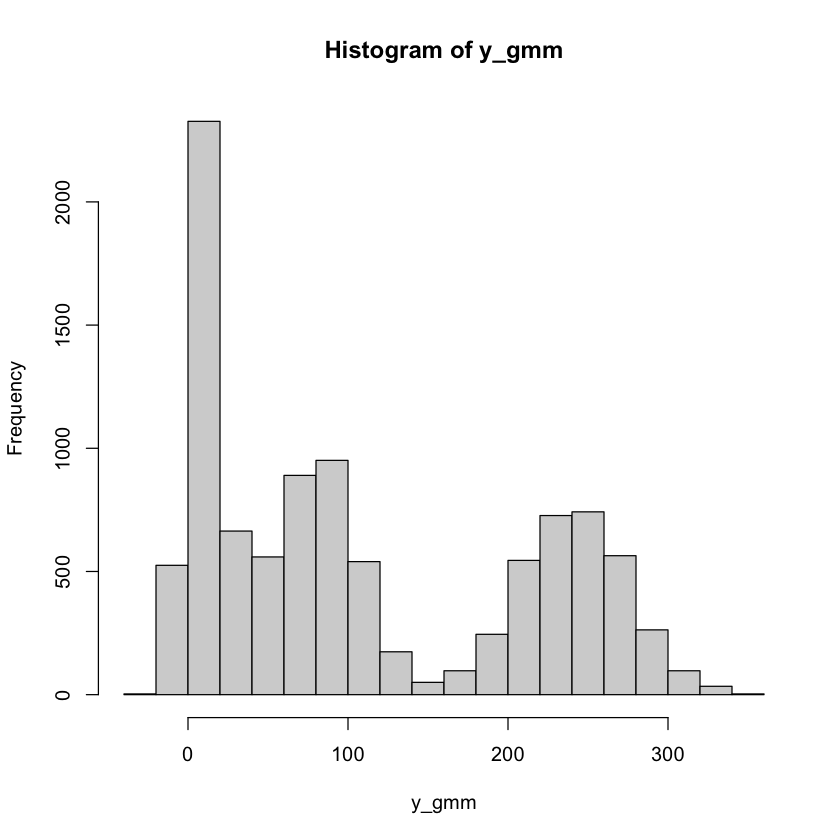

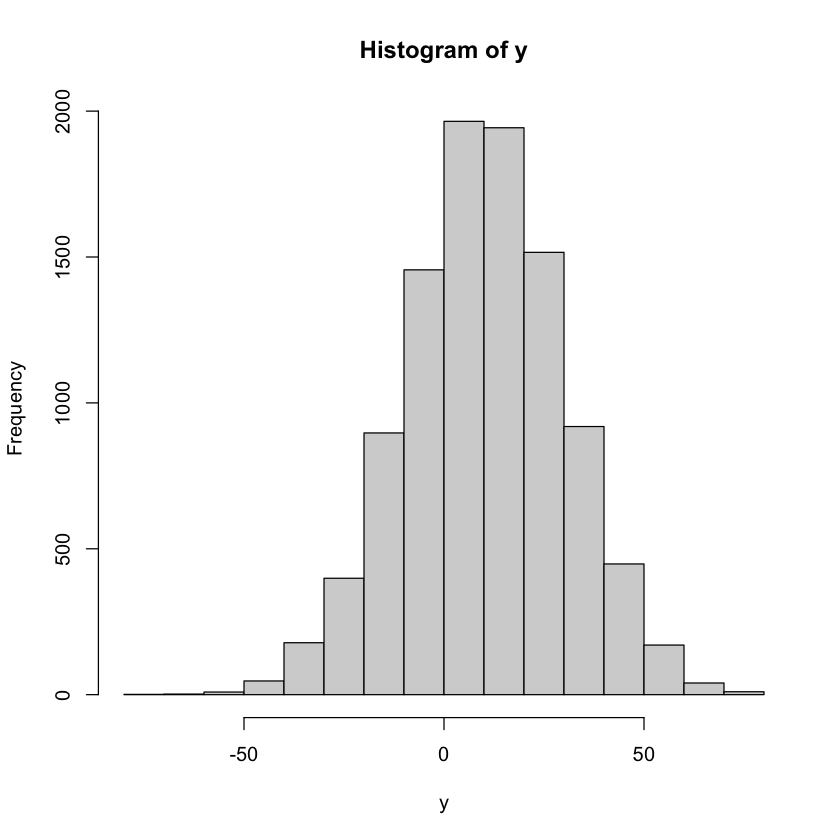

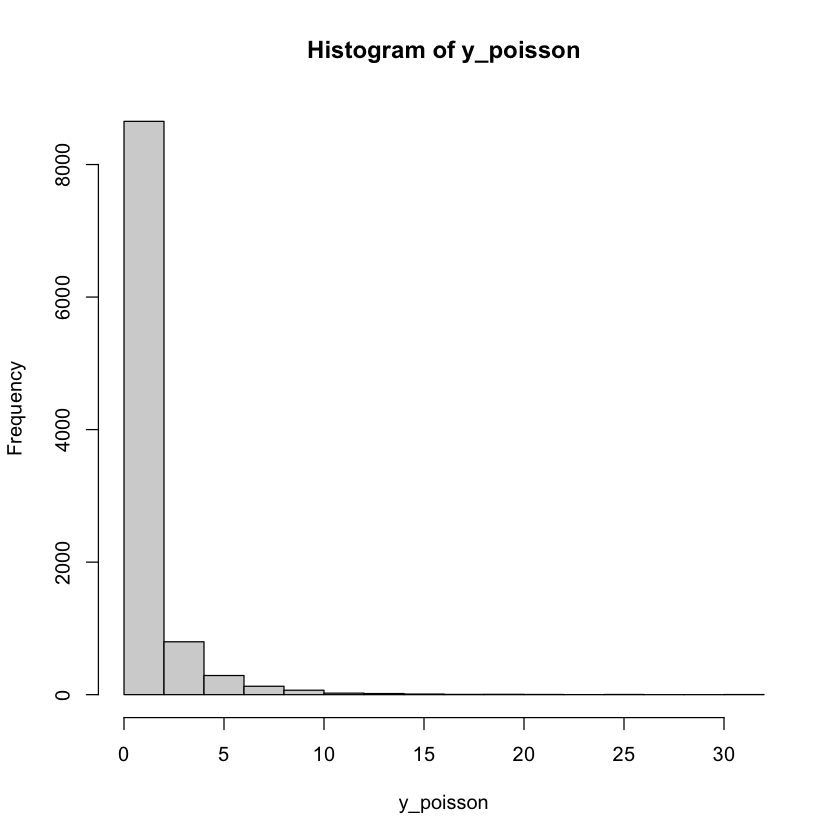

In [1]:
# 10000行
n <- 10000
# 1000変数
ncol <- 1000
# 測定エラー
e <- rnorm(n) * 0.1
# 切片
b <- 10

# モデルの係数
a <- c(10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
a <- c(a, rep(0.1, ncol - length(a)))

# 100変数までがYに関係する
dcol <- 100

# 正規分布のYを生成
y <- numeric(n)

# 混合正規分布のYを同時に生成
y_gmm <- numeric(n)
# Yに関係する変数を3つ毎に切り替え 1つめの山と2つ目の山(2を掛けるので分散が少し大きい)、3つ目の山(3を掛けるのでさらにぶんさんが大きい)
a_gmm <- matrix(nrow = n, ncol = 3)
a_gmm[1:n, 1] <- rep(c(1, 0, 0), length = n)
a_gmm[1:n, 2] <- rep(c(0, 2, 0), length = n)
a_gmm[1:n, 3] <- rep(c(0, 0, 3), length = n)

# Xを1000個作りつつ、Yを計算する
x <- matrix(nrow = n, ncol = ncol)
for (i in 1:ncol) {
    col <- rnorm(n)
    x[1:n, i] <- c(col)
    if (i <= dcol) {
        y <- y + col * a[[i]]
        y_gmm <- y_gmm + col * a_gmm[1:n, (i %% 3) + 1] * a[i]
    }
}
# 3つの山の平均をそれぞれずらす
y_gmm <- y_gmm + e + a_gmm[, 1] * 10
y_gmm <- y_gmm + a_gmm[, 2] * 40
y_gmm <- y_gmm + a_gmm[, 3] * 80
hist(y_gmm)

# 計測エラーと切片を足す
y <- y + e + b
hist(y)

# 正規分布のYを元にポアソン分布のYを生成
y_poisson <- floor(exp(scale(y)))
hist(y_poisson)

In [2]:
df <- data.frame(x)
df <- cbind(y_gmm, df)
df <- cbind(y_poisson, df)
df <- cbind(y, df)
write.csv(df, "data-independent.csv")
zip("data-independent.zip", "data-independent.csv")
file.remove("data-independent.csv")
df

[1] TRUE

y,y_poisson,y_gmm,X1,X2,X3,X4,X5,X6,X7,⋯,X991,X992,X993,X994,X995,X996,X997,X998,X999,X1000
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.4013565,1,16.398462,-0.63294941,0.66208762,0.32702619,1.42689765,-1.23125599,-0.18313543,-0.90124283,⋯,-0.4067970,0.04737090,0.425200858,-0.40625156,-0.20115292,-1.24309440,0.31958489,0.03957404,-0.65318356,0.1854350
53.7238793,8,107.009855,1.59439657,2.23176756,0.92268517,-0.02322486,0.92483297,0.86427356,-0.63368981,⋯,2.3595115,0.70828330,-0.101610504,-1.32459758,-1.23088886,-0.65061179,0.12320094,-0.42814297,-0.91731023,-0.8334126
22.2189340,1,251.585907,-0.37621749,-0.83883510,-1.07524749,2.26161149,1.43437486,1.18535094,0.19366325,⋯,-0.5682627,-1.22469430,-0.329087312,1.44687962,0.12343504,-0.50727039,2.13733995,-0.99964311,1.62401087,1.0265094
26.4733726,2,4.271874,0.86011673,1.34259980,-0.92745659,1.00104306,-0.64458743,0.36294824,0.42656810,⋯,-2.5399887,-1.71030740,1.390771475,1.24535195,1.27737926,0.48582381,0.34368444,-0.19891477,-1.44593508,-1.2893810
-19.7004907,0,67.204128,0.78868952,0.06413813,-0.26110338,-2.59564592,-1.35039123,-2.30967392,1.47512331,⋯,-1.9012389,-0.02919818,0.657082802,0.57403246,-0.59681449,-0.53390977,1.96967583,-0.79719700,0.57425879,-0.4665034
-1.7301564,0,199.333864,0.50419105,-1.35310054,-0.02292109,0.87644153,-0.06921906,-0.40111985,-0.69022322,⋯,-0.4564648,1.34165207,0.319284125,0.46754537,0.70921586,0.46271500,-0.29889884,-1.83609705,0.58686703,-0.3645437
6.4209403,0,16.433339,-1.01744438,-0.83391234,-0.02321360,-0.06281457,0.73219133,0.34215934,0.84031655,⋯,1.1480086,1.01598604,-0.010973998,0.65290660,-0.55882870,-0.06109881,1.41148837,-0.30399343,0.91494699,0.9726770
20.2312759,1,115.427459,0.70220263,0.15374512,0.74357664,0.79454512,0.63540994,-2.34525916,1.27082273,⋯,1.5926230,0.06372791,0.226546246,1.64946887,0.26987934,-1.53442129,0.96538304,-0.69965184,-0.89081171,0.2497215
0.4301808,0,245.767400,-0.34561771,0.11566338,-1.15374638,-1.00374840,0.75038214,0.58809217,0.97127580,⋯,1.2203173,0.21458060,-0.441118162,0.16555826,0.33256060,0.10429453,1.63160185,-1.17653350,1.39015355,0.5683834
